In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Cargar el dataset
file_path = 'data_evaluacion_decoded.csv'
df = pd.read_csv(file_path)

# Mostramos las primeras filas del dataset
df.head()

,Unnamed: 0,edad,fnlwgt,educacion_num,estado_civil,relacion,raza,genero,ganancia-capital,perdida-capital,horas_semana,pais,tipo_empleo,salario
0,0,39,77516,13,1,1,4,1,1,0,40,1,0,1
1,1,50,83311,13,0,0,4,1,0,0,13,1,2,1
2,2,38,215646,9,1,1,4,1,0,0,40,1,1,1
3,3,53,234721,7,0,0,2,1,0,0,40,1,1,1
4,4,28,338409,13,0,5,2,0,0,0,40,0,1,1


In [3]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,edad,fnlwgt,educacion_num,estado_civil,relacion,raza,genero,ganancia-capital,perdida-capital,horas_semana,pais,tipo_empleo,salario
0,39,77516,13,1,1,4,1,1,0,40,1,0,1
1,50,83311,13,0,0,4,1,0,0,13,1,2,1
2,38,215646,9,1,1,4,1,0,0,40,1,1,1
3,53,234721,7,0,0,2,1,0,0,40,1,1,1
4,28,338409,13,0,5,2,0,0,0,40,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   edad              48842 non-null  int64
 1   fnlwgt            48842 non-null  int64
 2   educacion_num     48842 non-null  int64
 3   estado_civil      48842 non-null  int64
 4   relacion          48842 non-null  int64
 5   raza              48842 non-null  int64
 6   genero            48842 non-null  int64
 7   ganancia-capital  48842 non-null  int64
 8   perdida-capital   48842 non-null  int64
 9   horas_semana      48842 non-null  int64
 10  pais              48842 non-null  int64
 11  tipo_empleo       48842 non-null  int64
 12  salario           48842 non-null  int64
dtypes: int64(13)
memory usage: 4.8 MB


<Axes: >

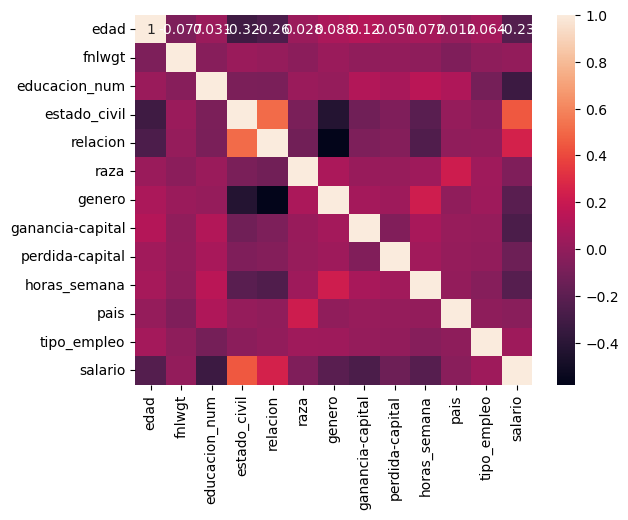

In [5]:
#Ver las relaciones de las etiquetas
sns.heatmap(df.corr(), annot=True)

In [6]:
# Definir las características (X) y la variable objetivo (y)
X = df.drop(['salario'], axis=1)
y = df['salario']

In [7]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [8]:
# Escalar las características utilizando MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Entrenar el modelo de red neuronal artificial
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_clf.fit(X_train_scaled, y_train)

MLPClassifier(max_iter=300, random_state=42)

In [10]:
# Realizar predicciones con red neuronal artificial
y_pred_mlp = mlp_clf.predict(X_test_scaled)

In [11]:
# Evaluar el modelo de red neuronal artificial
classification_rep_mlp = classification_report(y_test, y_pred_mlp)
confusion_mat_mlp = confusion_matrix(y_test, y_pred_mlp)

In [19]:
# Función para mostrar la matriz de confusión
def plot_confusion_matrix(conf_matrix, title):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


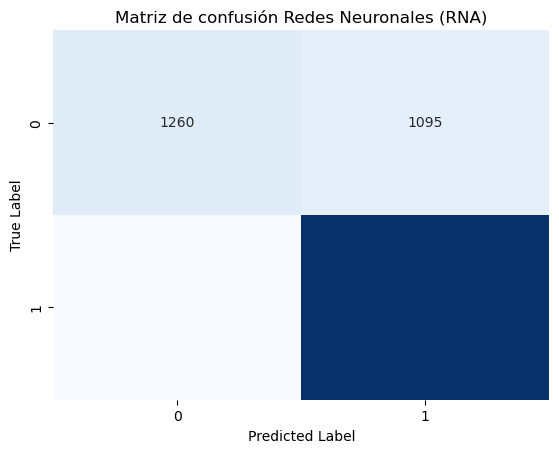

In [24]:
# Matriz de confusión para red neuronal artificial
plot_confusion_matrix(confusion_mat_mlp, 'Matriz de confusión Redes Neuronales (RNA)')

In [21]:
# Evaluación del modelo de red neuronal artificial
print("Classification Report for Neural Network (MLP):")
print(classification_rep_mlp)
print('Train Accuracy:', (mlp_clf.score(X_train_scaled, y_train)) * 100, "%")
print('Test Accuracy:', (mlp_clf.score(X_test_scaled, y_test)) * 100, "%")
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))

Classification Report for Neural Network (MLP):
              precision    recall  f1-score   support

           0       0.73      0.54      0.62      2355
           1       0.86      0.94      0.90      7414

    accuracy                           0.84      9769
   macro avg       0.80      0.74      0.76      9769
weighted avg       0.83      0.84      0.83      9769

Train Accuracy: 84.61085660174545 %
Test Accuracy: 84.03111884532706 %
Accuracy: 0.8403111884532706
